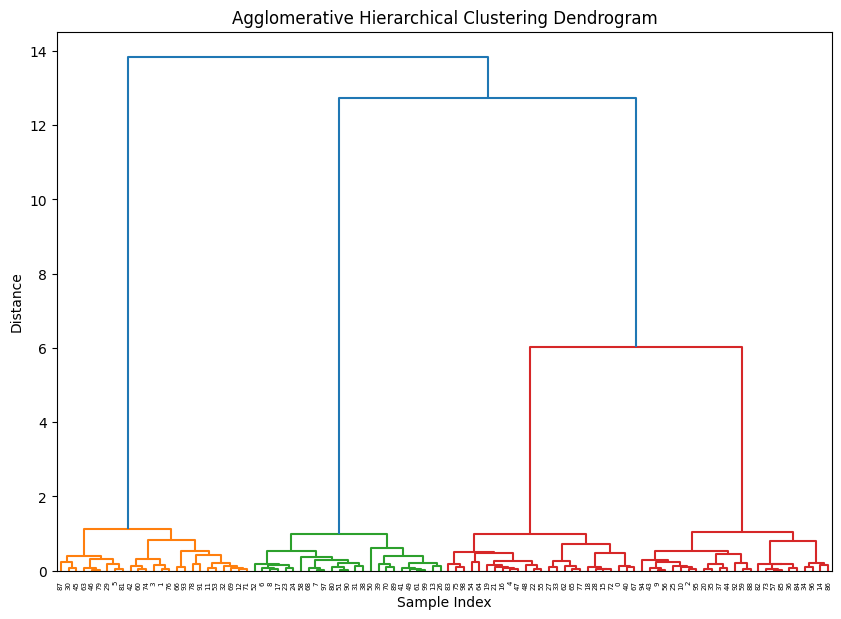

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs

# --- Generate synthetic dataset ---
X, _ = make_blobs(n_samples=100, centers=4, cluster_std=1.0, random_state=42)

# Standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Agglomerative Hierarchical Clustering (Bottom-up) ---

# Create linkage matrix
Z = linkage(X_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
plt.title('Agglomerative Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(Z)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


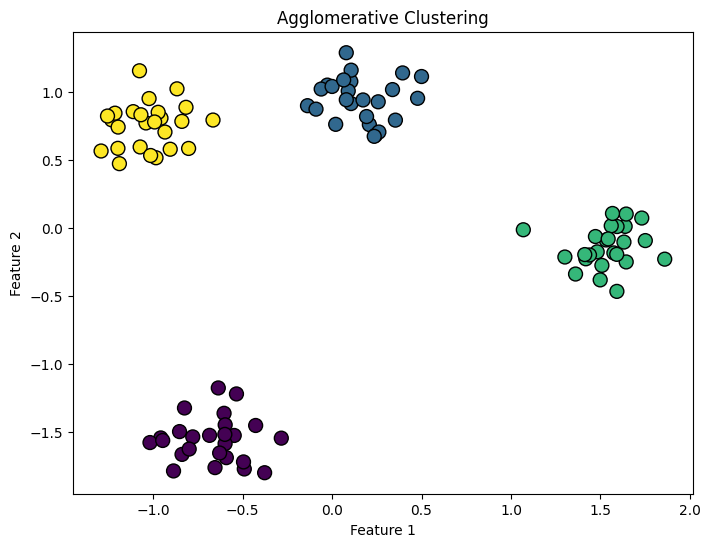

In [5]:
# Perform Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
agg_labels = agg_clustering.fit_predict(X_scaled)

# Plot Agglomerative Clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=agg_labels, cmap='viridis', marker='o', edgecolor='k', s=100)
plt.title('Agglomerative Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [6]:
# --- Divisive Hierarchical Clustering (Top-down) ---
# Divisive clustering using KMeans recursively

from sklearn.cluster import KMeans

def divisive_clustering(X, max_clusters=4):
    """
    Perform divisive clustering using KMeans recursively.
    Divides the data into clusters recursively until the maximum number of clusters is reached.
    """
    clusters = [(X, [i for i in range(len(X))])]  # Start with all data in one cluster
    labels = np.zeros(X.shape[0], dtype=int)

    current_cluster_label = 0
    while len(clusters) < max_clusters:
        new_clusters = []
        for cluster_data, cluster_indices in clusters:
            # Check if the cluster has at least 2 samples to apply KMeans
            if len(cluster_data) < 2:
                # If cluster has fewer than 2 samples, skip splitting
                labels[cluster_indices] = current_cluster_label
                current_cluster_label += 1
                continue

            # Apply KMeans on each cluster to split it into 2 subclusters
            kmeans = KMeans(n_clusters=2, random_state=42)
            sub_labels = kmeans.fit_predict(cluster_data)

            # Create new clusters and assign labels
            for sub_cluster_label in range(2):
                indices = [i for i, label in zip(cluster_indices, sub_labels) if label == sub_cluster_label]
                new_clusters.append((X[indices], indices))
                labels[indices] = current_cluster_label
                current_cluster_label += 1

        clusters = new_clusters

    return labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


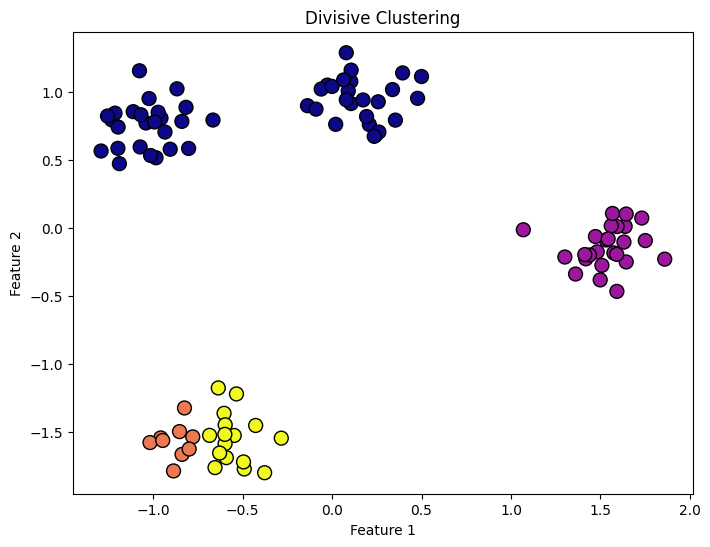

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


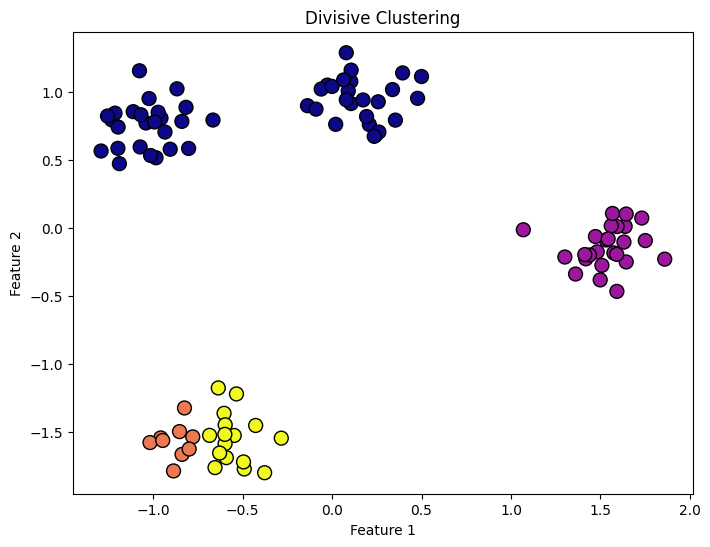

In [7]:
# Perform Divisive Clustering
div_labels = divisive_clustering(X_scaled, max_clusters=4)

# Plot Divisive Clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=div_labels, cmap='plasma', marker='o', edgecolor='k', s=100)
plt.title('Divisive Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


# Perform Divisive Clustering
div_labels = divisive_clustering(X_scaled, max_clusters=4)

# Plot Divisive Clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=div_labels, cmap='plasma', marker='o', edgecolor='k', s=100)
plt.title('Divisive Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
